In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv("swiggy.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   int64  
 5   Votes          8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Cuisine        8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 678.2+ KB


In [5]:
data.describe()

,ID,Price,Votes,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [6]:
data.head()

,ID,Area,City,Restaurant,Price,Votes,Total ratings,Cuisine,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [7]:
data.tail()

,ID,Area,City,Restaurant,Price,Votes,Total ratings,Cuisine,Address,Delivery time
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


In [8]:
selected_columns = ['Price', 'Total ratings', 'Votes', 'Cuisine', 'Delivery time']

In [9]:
data_selected = data[selected_columns]

In [14]:
sorted_data = data.sort_values(by=['City', 'Price'],ascending=[True, False])
sorted_data = sorted_data.iloc[:5, :]

In [15]:
sorted_data.shape

(5, 10)

<Figure size 2200x800 with 0 Axes>

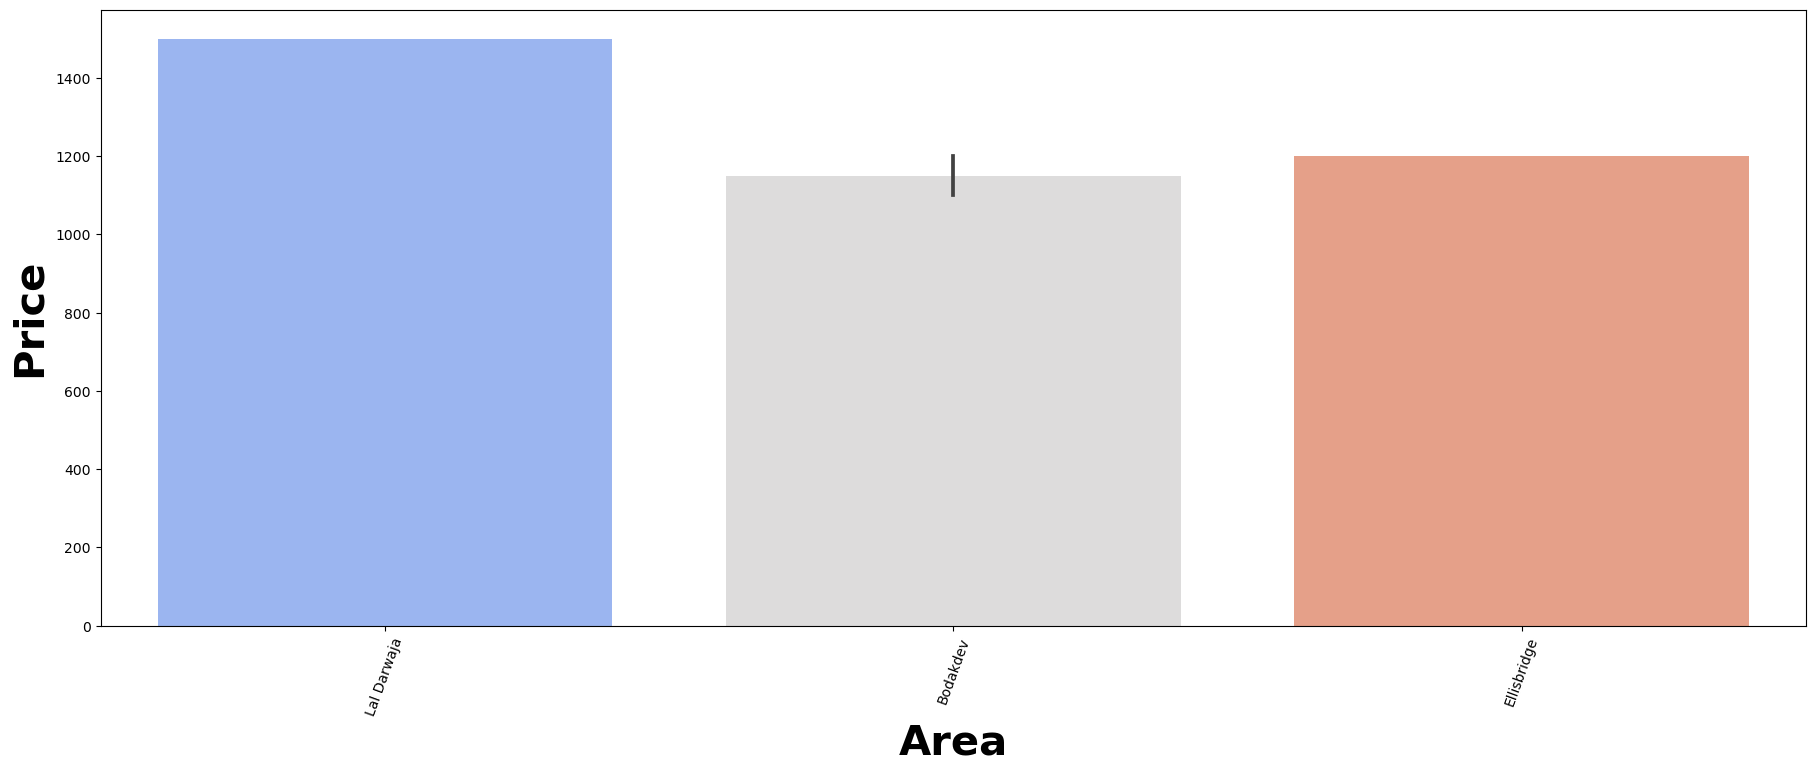

In [16]:
plt.figure(figsize=(22,8))
sns.barplot(x="Area", y="Price",data=sorted_data,palette='coolwarm')
plt.xlabel('Area', weight='bold',fontsize=30)
plt.ylabel('Price', weight='bold',fontsize=30)
plt.xticks(rotation=70)
plt.show()

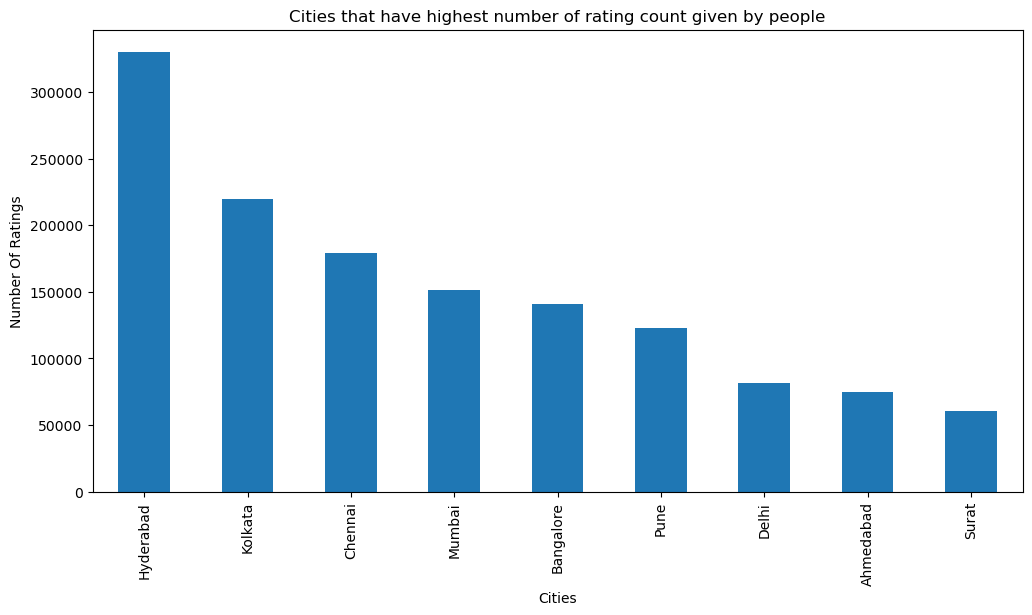

In [17]:
#Let’s visualize Cities that have the highest number of rating count given by people
highest_city_rating_count = data.groupby('City')['Total ratings'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
highest_city_rating_count.head(10).plot.bar()
plt.xlabel('Cities')
plt.ylabel('Number Of Ratings')
plt.title('Cities that have highest number of rating count given by people')
plt.show();

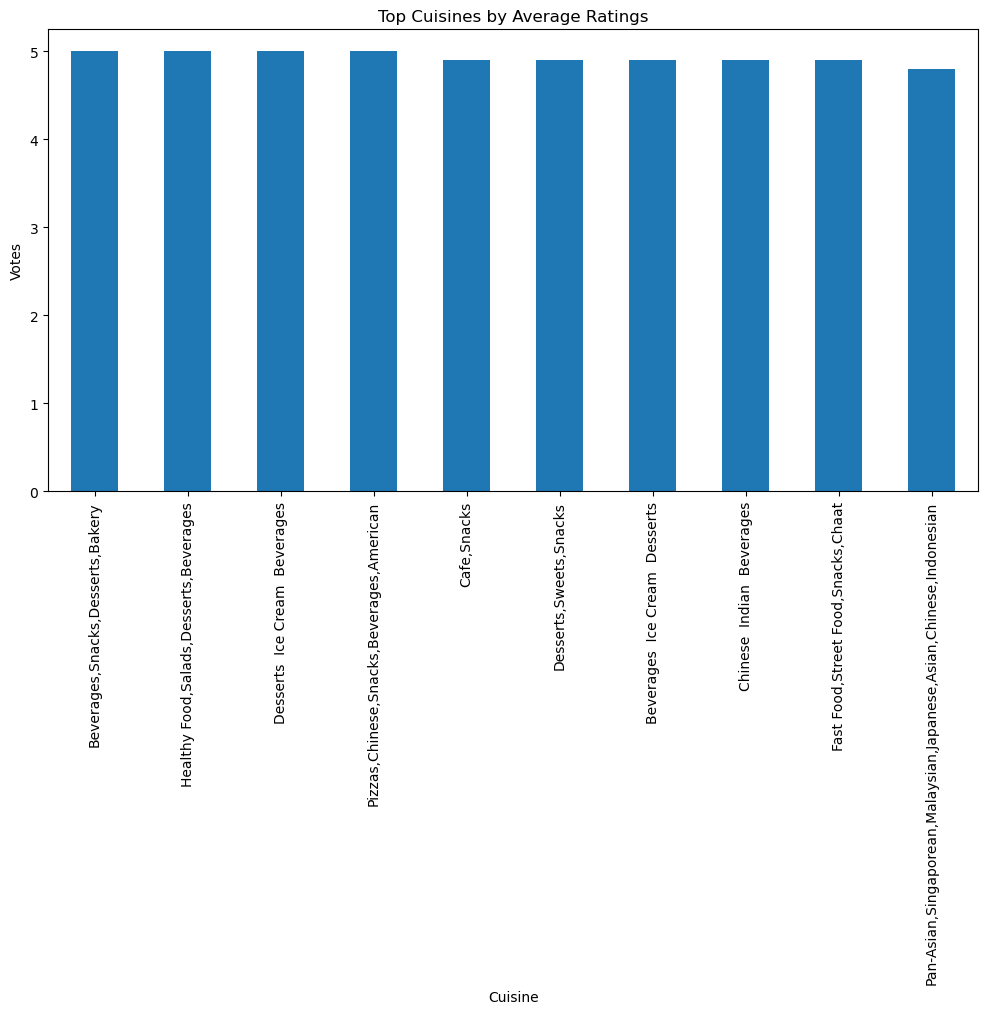

In [18]:
## Bar plot to compare cuisines based on average ratings
plt.figure(figsize=(12, 6))
top_cuisines = data.groupby('Cuisine')['Votes'].mean().sort_values(ascending=False).head(10)
top_cuisines.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Votes')
plt.title('Top Cuisines by Average Ratings')
plt.show()

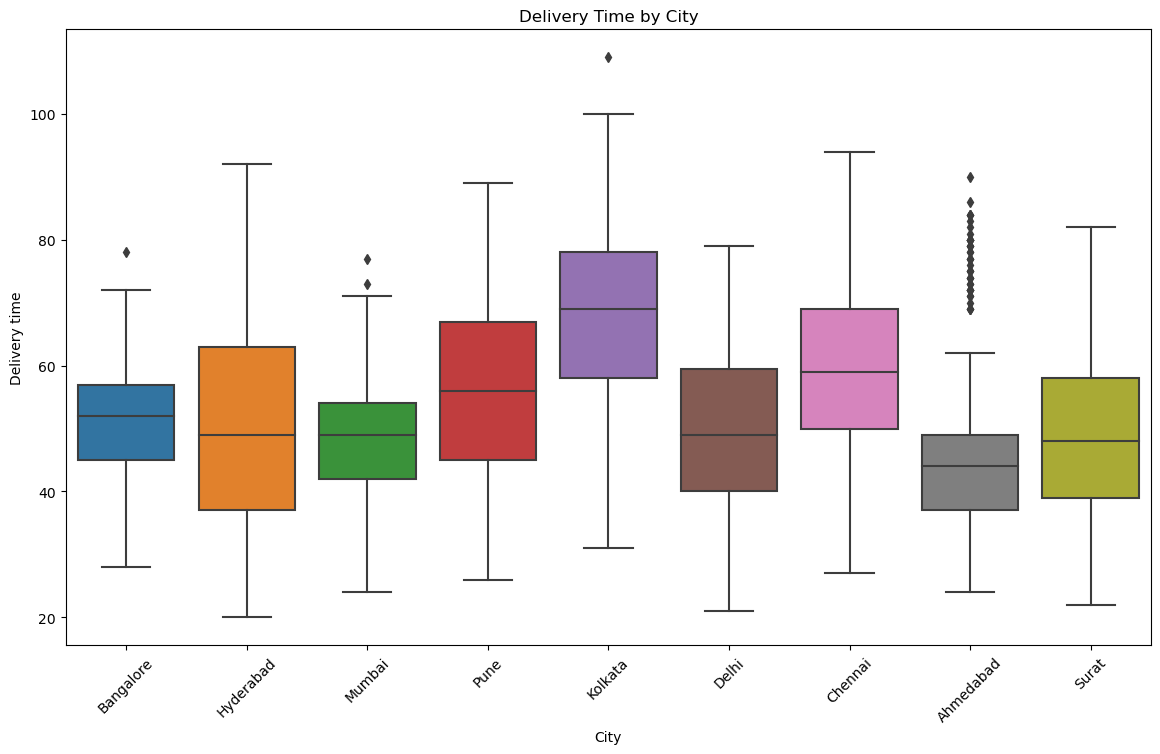

In [19]:
#Box plot to compare delivery time across different cities
plt.figure(figsize=(14, 8))
sns.boxplot(x='City', y='Delivery time', data=data)
plt.xticks(rotation=45)
plt.title('Delivery Time by City')
plt.show()

In [21]:
# Price vs. Average Ratings by City using Plotly
fig = px.scatter(data, x='Price', y='Votes', color='City',
                 hover_data=['Cuisine'], title='Price vs. Votes by City')
fig.show()

In [27]:
# Calculate the top 10 cuisines based on average ratings
top_cuisines = data.groupby('Cuisine')['Votes'].mean().sort_values(ascending=False).head(10).index

# Filter the data to include only the top 10 cuisines
filtered_data = data[data['Cuisine'].isin(top_cuisines)]

# Create the box plot using Plotly
fig_cuisine = px.box(filtered_data, x='Cuisine', y='Votes', title='Average Ratings by Cuisine (Top 10)')
fig_cuisine.show()

<Figure size 1200x600 with 0 Axes>

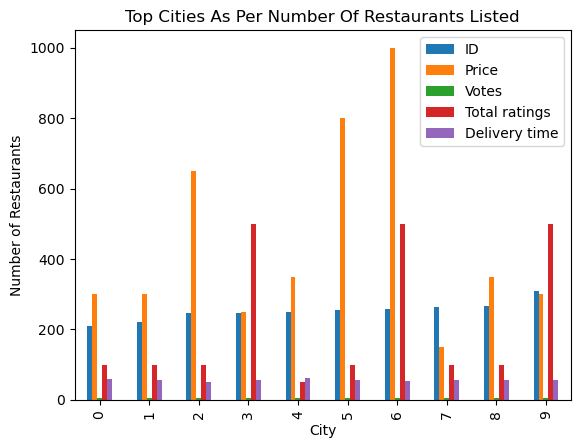

In [28]:
#What are the top cities as per the number of restaurants listed?
plt.figure(figsize=(12, 6))
data.head(10).plot.bar()
plt.title('Top Cities As Per Number Of Restaurants Listed')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

In [30]:
# Interactive scatter plot using Plotly for Price, Ratings, and Votes
fig_interactive = px.scatter(data, x='Price', y='Votes', color='Votes',
                             size='Total ratings', hover_data=['City'], title='Price, Ratings, and Votes')
fig_interactive.show()


In [31]:
# Extend the Linear Regression analysis
X = data[['Price', 'Total ratings', 'Votes', 'Delivery time']]
y = data['Votes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.4289492781466128e-28
Mean Absolute Error: 7.294728057652295e-15


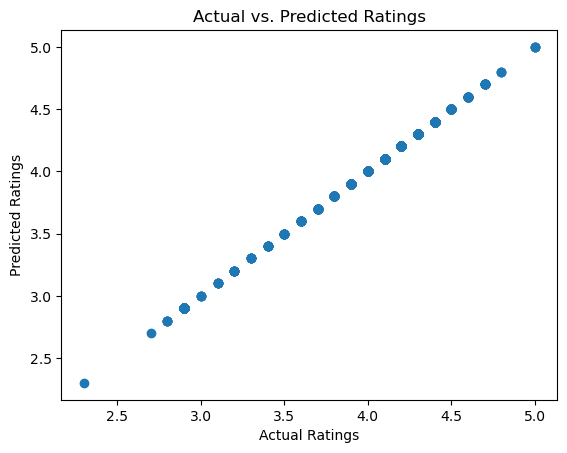

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()